In [1]:
import os
import cv2
import numpy as np
from PIL import Image

def load_images_from_directory(root_dir, target_size=(128, 128)):
    images = []
    labels = []
    class_dirs = sorted(os.listdir(root_dir))
    for class_idx, class_dir in enumerate(class_dirs):
        class_path = os.path.join(root_dir, class_dir)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, target_size)
            images.append(image)
            labels.append(class_idx)  # Assign label based on directory index
    return np.array(images), np.array(labels)

# Example usage
root_dir = './Training/'  # Replace this with your dataset directory
images, labels = load_images_from_directory(root_dir)

In [2]:
images.shape

(5712, 128, 128, 3)

In [3]:
labels[1:5]

array([0, 0, 0, 0])

In [4]:
import matplotlib.pyplot as plt

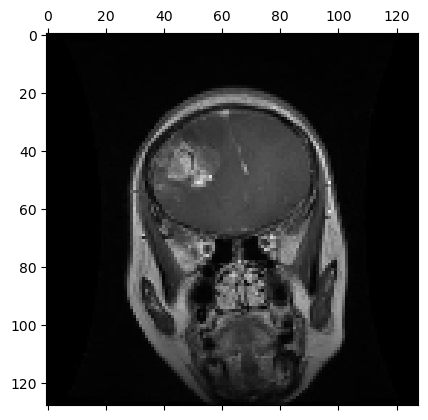

In [5]:
plt.matshow(images[0])

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.load_model('saved_models/model_1.keras')

In [8]:
predicted = model.predict(images)

179/179 [==============================] - 7s 38ms/step


In [9]:
y_pred = tf.argmax(predicted, axis=1).numpy()

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(labels, y_pred)

0.9900210084033614

In [12]:
class_names = ['glioma', 'meningioma', 'no tumor', 'pituitary']

In [13]:
x_train = images
y_train = labels

In [14]:
x_test, y_test = load_images_from_directory('./Testing/')

In [15]:
predicted = model.predict(x_test)

41/41 [==============================] - 2s 38ms/step


In [16]:
y_pred = tf.argmax(predicted, axis=1).numpy()

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.9527078565980168

In [19]:
num_samples = len(x_test)

# Generate shuffled indices
shuffled_indices = np.random.permutation(num_samples)

# Use shuffled indices to shuffle both X_test and y_test
x_test_shuffled = x_test[shuffled_indices]
y_test_shuffled = y_test[shuffled_indices]

In [20]:
predicted = model.predict(x_test_shuffled)
y_pred = tf.argmax(predicted, axis=1).numpy()
print(accuracy_score(y_test_shuffled, y_pred))

41/41 [==============================] - 2s 41ms/step
0.9527078565980168


In [21]:
y_test_shuffled[:5]

array([1, 3, 0, 2, 0])

In [22]:
def f(X):
    tmp = X.copy()
    # preprocess_input(tmp)
    return model.predict(tmp)

In [23]:
f(x_test_shuffled[:3])

1/1 [==============================] - 0s 23ms/step


array([[1.7647840e-04, 9.9982351e-01, 3.7923811e-10, 8.8428884e-16],
       [2.7163127e-15, 1.9587700e-09, 2.3516318e-09, 1.0000000e+00],
       [1.0000000e+00, 2.7445678e-13, 9.4003059e-14, 2.6716879e-14]],
      dtype=float32)

In [24]:
!pip install shap

In [25]:
import shap

In [26]:
x_test_shuffled.shape

(1311, 128, 128, 3)

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:   2%|█▏                                                           | 1/50 [00:00<?, ?it/s]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:   6%|███▏                                                 | 3/50 [00:22<04:27,  5.69s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:   8%|████▏                                                | 4/50 [00:34<06:20,  8.27s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  10%|█████▎                                               | 5/50 [00:45<06:52,  9.16s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  12%|██████▎                                              | 6/50 [00:56<07:08,  9.75s/it]

2/2 [==============================] - 0s 26ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  14%|███████▍                                             | 7/50 [01:07<07:18, 10.20s/it]

2/2 [==============================] - 0s 25ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  16%|████████▍                                            | 8/50 [01:17<07:08, 10.20s/it]

2/2 [==============================] - 0s 25ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  18%|█████████▌                                           | 9/50 [01:27<06:48,  9.97s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  20%|██████████▍                                         | 10/50 [01:38<06:49, 10.25s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  22%|███████████▍                                        | 11/50 [01:49<06:57, 10.69s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  24%|████████████▍                                       | 12/50 [01:58<06:23, 10.08s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


PartitionExplainer explainer:  26%|█████████████▌                                      | 13/50 [02:10<06:34, 10.66s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  28%|██████████████▌                                     | 14/50 [02:21<06:33, 10.93s/it]

2/2 [==============================] - 0s 21ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  30%|███████████████▌                                    | 15/50 [02:33<06:29, 11.14s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  32%|████████████████▋                                   | 16/50 [02:43<06:06, 10.77s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  34%|█████████████████▋                                  | 17/50 [02:55<06:06, 11.11s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  36%|██████████████████▋                                 | 18/50 [03:05<05:49, 10.93s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  38%|███████████████████▊                                | 19/50 [03:16<05:35, 10.83s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  40%|████████████████████▊                               | 20/50 [03:26<05:21, 10.70s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  42%|█████████████████████▊                              | 21/50 [03:38<05:21, 11.09s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  44%|██████████████████████▉                             | 22/50 [03:51<05:21, 11.47s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  46%|███████████████████████▉                            | 23/50 [04:01<04:59, 11.08s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  48%|████████████████████████▉                           | 24/50 [04:11<04:43, 10.92s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  50%|██████████████████████████                          | 25/50 [04:22<04:31, 10.85s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  52%|███████████████████████████                         | 26/50 [04:34<04:25, 11.08s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  54%|████████████████████████████                        | 27/50 [04:44<04:12, 10.97s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  56%|█████████████████████████████                       | 28/50 [04:55<03:59, 10.89s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


PartitionExplainer explainer:  58%|██████████████████████████████▏                     | 29/50 [05:06<03:46, 10.77s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  60%|███████████████████████████████▏                    | 30/50 [05:18<03:44, 11.20s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  62%|████████████████████████████████▏                   | 31/50 [05:27<03:23, 10.72s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  64%|█████████████████████████████████▎                  | 32/50 [05:38<03:10, 10.59s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  66%|██████████████████████████████████▎                 | 33/50 [05:48<02:59, 10.56s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  68%|███████████████████████████████████▎                | 34/50 [05:59<02:48, 10.53s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  70%|████████████████████████████████████▍               | 35/50 [06:09<02:38, 10.59s/it]

2/2 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  72%|█████████████████████████████████████▍              | 36/50 [06:21<02:31, 10.86s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  74%|██████████████████████████████████████▍             | 37/50 [06:33<02:26, 11.27s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  76%|███████████████████████████████████████▌            | 38/50 [06:43<02:09, 10.82s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  78%|████████████████████████████████████████▌           | 39/50 [06:55<02:02, 11.11s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  80%|█████████████████████████████████████████▌          | 40/50 [07:07<01:54, 11.42s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  82%|██████████████████████████████████████████▋         | 41/50 [07:16<01:37, 10.83s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  84%|███████████████████████████████████████████▋        | 42/50 [07:28<01:28, 11.12s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  86%|████████████████████████████████████████████▋       | 43/50 [07:38<01:14, 10.62s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  88%|█████████████████████████████████████████████▊      | 44/50 [07:49<01:05, 10.99s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  90%|██████████████████████████████████████████████▊     | 45/50 [08:01<00:55, 11.10s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  92%|███████████████████████████████████████████████▊    | 46/50 [08:13<00:46, 11.55s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  94%|████████████████████████████████████████████████▉   | 47/50 [08:24<00:33, 11.22s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  96%|█████████████████████████████████████████████████▉  | 48/50 [08:36<00:22, 11.45s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


PartitionExplainer explainer:  98%|██████████████████████████████████████████████████▉ | 49/50 [08:46<00:11, 11.22s/it]

2/2 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer: 100%|████████████████████████████████████████████████████| 50/50 [08:58<00:00, 11.18s/it]

2/2 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer: 51it [09:08, 10.97s/it]                                                                  


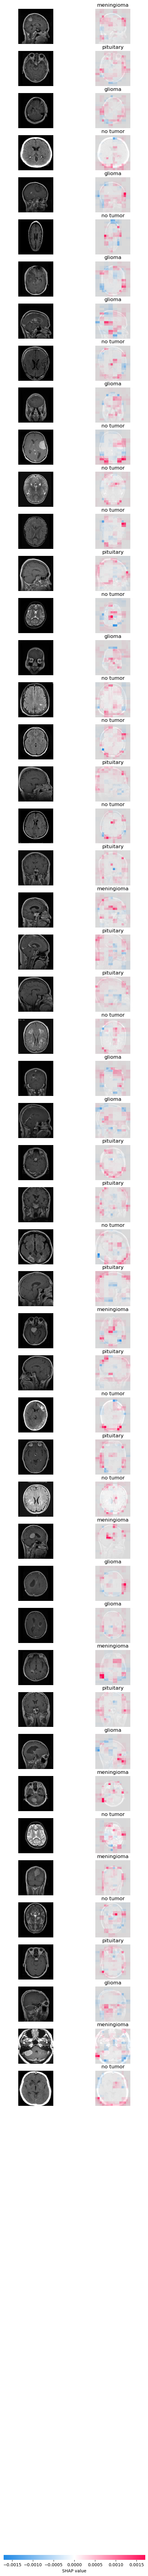

In [27]:
masker = shap.maskers.Image("inpaint_telea", x_test_shuffled[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    x_test_shuffled[:50], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1]
)
shap.image_plot(shap_values)

In [28]:
for i in y_test_shuffled[:50]:
    print(class_names[i])

meningioma
pituitary
glioma
no tumor
glioma
no tumor
glioma
glioma
no tumor
glioma
meningioma
no tumor
no tumor
pituitary
no tumor
glioma
no tumor
no tumor
pituitary
no tumor
pituitary
meningioma
pituitary
pituitary
no tumor
glioma
glioma
pituitary
pituitary
no tumor
pituitary
meningioma
pituitary
no tumor
pituitary
no tumor
meningioma
glioma
glioma
meningioma
pituitary
glioma
meningioma
no tumor
meningioma
no tumor
pituitary
glioma
meningioma
no tumor


In [29]:
accuracy_score(y_test_shuffled[:50], tf.argmax(model.predict(x_test_shuffled[:50]), axis=1).numpy())

2/2 [==============================] - 0s 25ms/step


0.98